### 03_02 Preparing Text for Clustering

In [7]:
import pandas as pd

#Load course hashtags
hashtags_df = pd.read_csv("Course-Hashtags.csv")
print("\nSample hashtags data :")
print(hashtags_df[:2])

# Seperate Hashtags and titles to lists
hash_list = hashtags_df["HashTags"].tolist()
title_list = hashtags_df["Course"].tolist()

# Do TF-IDF conversion of hashtags
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")
hash_matrix = vectorizer.fit_transform(hash_list)
print("\n Feature names Identified :\n")
print(vectorizer.get_feature_names_out())


Sample hashtags data :
                            Course                             HashTags
0  Apache Spark Essential Training  BigData,DataScience,MachineLearning
1           Java Memory Management            Java,Advanced,Programming

 Feature names Identified :

['advanced' 'automation' 'bigdata' 'datascience' 'design' 'developer'
 'gcp' 'graphics' 'hadoop' 'ide' 'intermediate' 'java' 'jdbc' 'kubernetes'
 'machinelearning' 'patterns' 'programming' 'python' 'scala' 'scripting']


### 03_03 Clustering TF-IDF data

In [8]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

# Split data into 3 clusters
kmeans = KMeans(n_clusters=3).fit(hash_matrix)

# get Cluster labels
clusters = kmeans.labels_

# print clusters lablel and Courses under each cluster
for group in set(clusters):
    print("\nGroup : :", group, "\n----------------------")

    for i in hashtags_df.index:
        if (clusters[i] == group):
            print(title_list[i])


/Users/engfares/.local/share/virtualenvs/1_Text-Analytics-and-Predictions-with-Pyth-Mlmedqi7/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Group : : 0 
----------------------
Python Automation and Testing
Python for Graphics
Python Design Patterns
Python Scripting

Group : : 1 
----------------------
Java Memory Management
Java : Database Integration and JDBC
R Programming
Java IDE Overview
Kubernetes for Java Developers

Group : : 2 
----------------------
Apache Spark Essential Training
Machine Learning and AI Foundations
Hadoop for Data Science
Data Science on Google Cloud Platform
Scala for Data Science


### 03_04 Finding optimal Cluster size

/Users/engfares/.local/share/virtualenvs/1_Text-Analytics-and-Predictions-with-Pyth-Mlmedqi7/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Sum of squared distances :  [11.433022387031059, 9.055813116540268, 6.761066172191217, 5.6283212260073165, 4.688883377604406, 3.8776553357988535, 3.3481406712109574, 2.8186260066230613, 2.2891113420351648, 2.0217325681646887, 1.327122598510555, 0.886634022645722, 0.40164181287464173, 8.881784197001252e-16]


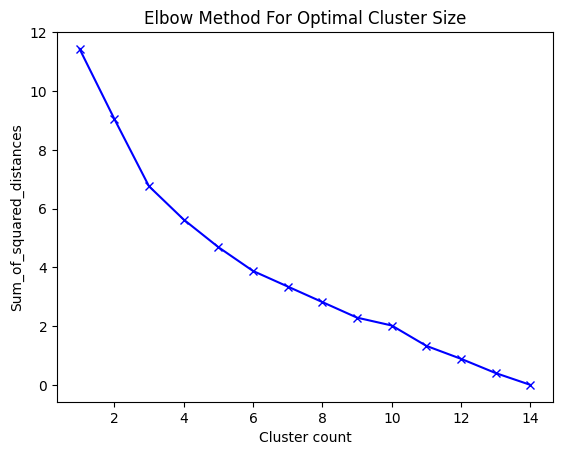

In [10]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(hash_matrix)
    sosd.append(km.inertia_)

print("Sum of squared distances : ", sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib

mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()
